#### cv2 installation
```bash
pip install opencv-python
```

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import pyvista as pv

In [29]:
headData = np.fromfile('local-data/HeadMRVolume.raw', dtype='uint8')
headData = headData.reshape(42, 62, 48)
brainData = np.fromfile('./local-data/T2.raw', dtype='float32')
brainData = brainData.reshape((320,320,256))
ct_scan = pv.read('./local-data/ctscan_ez.vtk')

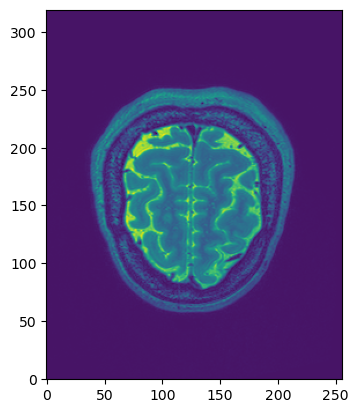

In [ ]:
plt.figure()
plt.imshow(brainData[:,50,:])
plt.gca().invert_yaxis()
plt.savefig('brainData.png')
plt.show()

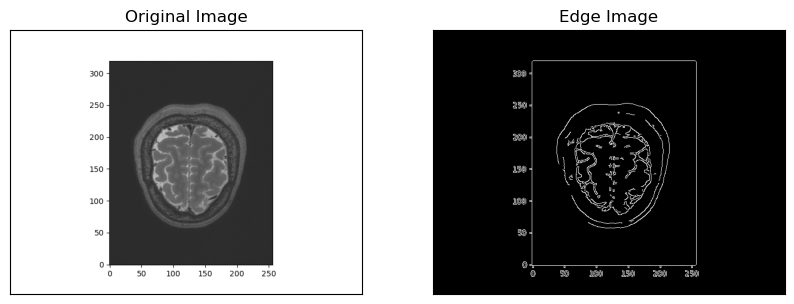

In [6]:
# Load the image
image = cv2.imread('brainData.png', cv2.IMREAD_GRAYSCALE)

# Perform Canny edge detection
edges = cv2.Canny(image, 100, 200)

# Display the original image and the edge-detected image
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [27]:
# plot figure from file
plt.figure()


def show_slice(axis, slice_num):
    if axis == 'x':
        slice_data = brainData[slice_num, :, :]
    elif axis == 'y':
        slice_data = brainData[:, slice_num, :]
    elif axis == 'z':
        slice_data = brainData[:, :, slice_num]
        
        
    plt.subplot(1, 2, 1)
    plt.imshow(slice_data)
    plt.title('Original Slice')
        
    # Perform Canny edge detection
    normalized_data = cv2.normalize(slice_data, None, 0, 255, cv2.NORM_MINMAX)
    normalized_data = normalized_data.astype(np.uint8)
    
    edges = cv2.Canny(normalized_data, 100, 200)
    
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    plt.show()
    
slice_widget=widgets.IntSlider(min=0, max=42, step=1, value=20)
axis_widget=widgets.Dropdown(options=['x', 'y', 'z'], value='x', description='Axis:')


# create interact that calls a function (i.e., show_slice) using inputs from the widgets
interact(show_slice, slice_num=slice_widget, axis=axis_widget)

<Figure size 640x480 with 0 Axes>

interactive(children=(Dropdown(description='Axis:', options=('x', 'y', 'z'), value='x'), IntSlider(value=20, d…

<function __main__.show_slice(axis, slice_num)>

In [57]:
# plot figure from file
plotter = pv.Plotter()
plt.figure()

def show_slice(axis, slice_num):
    if axis == 'x':
        slice_data = (slice_num, 0, 0)
        normal = [1,0,0]
        position = 'yz'
    elif axis == 'y':
        slice_data = (0, slice_num, 0)
        normal = [0,1,0]
        position = 'xz'
    elif axis == 'z':
        slice_data = (0, 0, slice_num)
        normal = [0,0,1]
        position = 'xy'
    
    slice = ct_scan.slice(normal=normal, origin=slice_data)
    
    plotter.clear()
    plotter.add_mesh(slice, cmap='gray', show_scalar_bar=False)

    plotter.remove_legend()
    
    plotter.show(screenshot='ct_slice.png', interactive=False, cpos=position)
        
    # Perform Canny edge detection
    image = cv2.imread('ct_slice.png', cv2.IMREAD_GRAYSCALE)
    
    edges = cv2.Canny(image, 100, 200)
    
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    plt.show()
    
slice_widget=widgets.IntSlider(min=1, max=291, step=1, value=20)
axis_widget=widgets.Dropdown(options=['x', 'y', 'z'], value='x', description='Axis:')


# create interact that calls a function (i.e., show_slice) using inputs from the widgets
interact(show_slice, slice_num=slice_widget, axis=axis_widget)

<Figure size 640x480 with 0 Axes>

interactive(children=(Dropdown(description='Axis:', options=('x', 'y', 'z'), value='x'), IntSlider(value=20, d…

<function __main__.show_slice(axis, slice_num)>

In [54]:
slice = ct_scan.slice(normal=[0,1,0], origin=(0,50,0))
slice.point_data.keys()

['image_data']

In [ ]:
plotter = pv.Plotter()
slice = ct_scan.slice(normal=[0,1,0], origin=(0,50,0))
plotter.clear()
plotter.add_mesh(slice, cmap='gray')
plotter.show()

Widget(value='<iframe src="http://localhost:54571/index.html?ui=P_0x1c8227d2e70_6&reconnect=auto" class="pyvis…

AttributeError: 'ImageData' object has no attribute 'shape'